In [96]:
%load_ext lab_black
%cd ..

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black
/root/dev/ddpm


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timezone

https://www.kaggle.com/competitions/child-mind-institute-detect-sleep-states/data

In [3]:
df = pd.read_parquet("../data/kaggle-sleep-detection/train_series.parquet", engine="pyarrow")

In [21]:
df1 = df[df["series_id"] == "038441c925bb"]

In [22]:
df1

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.636700,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.636800,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.637000,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.636800,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.636800,0.0215
...,...,...,...,...,...
389875,038441c925bb,389875,2018-09-06T04:59:35-0400,-27.373899,0.0110
389876,038441c925bb,389876,2018-09-06T04:59:40-0400,-27.493799,0.0110
389877,038441c925bb,389877,2018-09-06T04:59:45-0400,-27.533701,0.0111
389878,038441c925bb,389878,2018-09-06T04:59:50-0400,-28.003599,0.0111


In [100]:
len(df.series_id.unique())

277

In [34]:
df_events = pd.read_csv("../data/kaggle-sleep-detection/train_events.csv")
df_events

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400
...,...,...,...,...,...
14503,fe90110788d2,33,wakeup,560604.0,2017-09-06T04:07:00-0400
14504,fe90110788d2,34,onset,574620.0,2017-09-06T23:35:00-0400
14505,fe90110788d2,34,wakeup,581604.0,2017-09-07T09:17:00-0400
14506,fe90110788d2,35,onset,NaN,NaN


In [99]:
df_events.event.unique()

array(['onset', 'wakeup'], dtype=object)

In [57]:
t = []
for x in df1.timestamp:
    if isinstance(x, float):
        t.append(x)
    elif isinstance(x, str):
        t.append(datetime.strptime(x, "%Y-%m-%dT%H:%M:%S%z").timestamp())
    else:
        assert False, x

df1["t"] = t

/tmp/ipykernel_216958/1337652171.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["t"] = t


In [58]:
df1

,series_id,step,timestamp,anglez,enmo,t
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.636700,0.0217,1.534275e+09
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.636800,0.0215,1.534275e+09
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.637000,0.0216,1.534275e+09
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.636800,0.0213,1.534275e+09
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.636800,0.0215,1.534275e+09
...,...,...,...,...,...,...
389875,038441c925bb,389875,2018-09-06T04:59:35-0400,-27.373899,0.0110,1.536224e+09
389876,038441c925bb,389876,2018-09-06T04:59:40-0400,-27.493799,0.0110,1.536224e+09
389877,038441c925bb,389877,2018-09-06T04:59:45-0400,-27.533701,0.0111,1.536224e+09
389878,038441c925bb,389878,2018-09-06T04:59:50-0400,-28.003599,0.0111,1.536224e+09


In [52]:
t = []
for x in df_events.timestamp:
    if isinstance(x, float):
        t.append(x)
    elif isinstance(x, str):
        t.append(datetime.strptime(x, "%Y-%m-%dT%H:%M:%S%z").timestamp())
    else:
        assert False, x
df_events["t"] = t

In [59]:
df_events

,series_id,night,event,step,timestamp,t
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400,1.534300e+09
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400,1.534330e+09
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400,1.534376e+09
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400,1.534412e+09
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400,1.534475e+09
...,...,...,...,...,...,...
14503,fe90110788d2,33,wakeup,560604.0,2017-09-06T04:07:00-0400,1.504685e+09
14504,fe90110788d2,34,onset,574620.0,2017-09-06T23:35:00-0400,1.504755e+09
14505,fe90110788d2,34,wakeup,581604.0,2017-09-07T09:17:00-0400,1.504790e+09
14506,fe90110788d2,35,onset,NaN,NaN,NaN


In [92]:
df_events.series_id.unique()[:10]

array(['038441c925bb', '03d92c9f6f8a', '0402a003dae9', '04f547b8017d',
       '05e1944c3818', '062cae666e2a', '062dbd4c95e6', '08db4255286f',
       '0a96f4993bd7', '0cd1e3d0ed95'], dtype=object)

In [95]:
df_events.night.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84])

In [94]:
df_events[df_events["series_id"] == "0402a003dae9"]

,series_id,night,event,step,timestamp,t
120,0402a003dae9,1,onset,8364.0,2018-12-19T00:22:00-0500,1.545197e+09
121,0402a003dae9,1,wakeup,12948.0,2018-12-19T06:44:00-0500,1.545220e+09
122,0402a003dae9,2,onset,24396.0,2018-12-19T22:38:00-0500,1.545277e+09
123,0402a003dae9,2,wakeup,29964.0,2018-12-20T06:22:00-0500,1.545305e+09
124,0402a003dae9,3,onset,NaN,NaN,NaN
125,0402a003dae9,3,wakeup,NaN,NaN,NaN
126,0402a003dae9,4,onset,NaN,NaN,NaN
127,0402a003dae9,4,wakeup,NaN,NaN,NaN
128,0402a003dae9,5,onset,NaN,NaN,NaN
129,0402a003dae9,5,wakeup,NaN,NaN,NaN


In [62]:
events = df_events[df_events["series_id"] == "038441c925bb"]

In [65]:
events.iloc[:10]

,series_id,night,event,step,timestamp,t
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400,1.534300e+09
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400,1.534330e+09
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400,1.534376e+09
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400,1.534412e+09
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400,1.534475e+09
5,038441c925bb,3,wakeup,44400.0,2018-08-17T05:10:00-0400,1.534497e+09
6,038441c925bb,4,onset,57240.0,2018-08-17T23:00:00-0400,1.534561e+09
7,038441c925bb,4,wakeup,62856.0,2018-08-18T06:48:00-0400,1.534589e+09
8,038441c925bb,5,onset,NaN,NaN,NaN
9,038441c925bb,5,wakeup,NaN,NaN,NaN


In [69]:
for i, data in events.iterrows():
    break

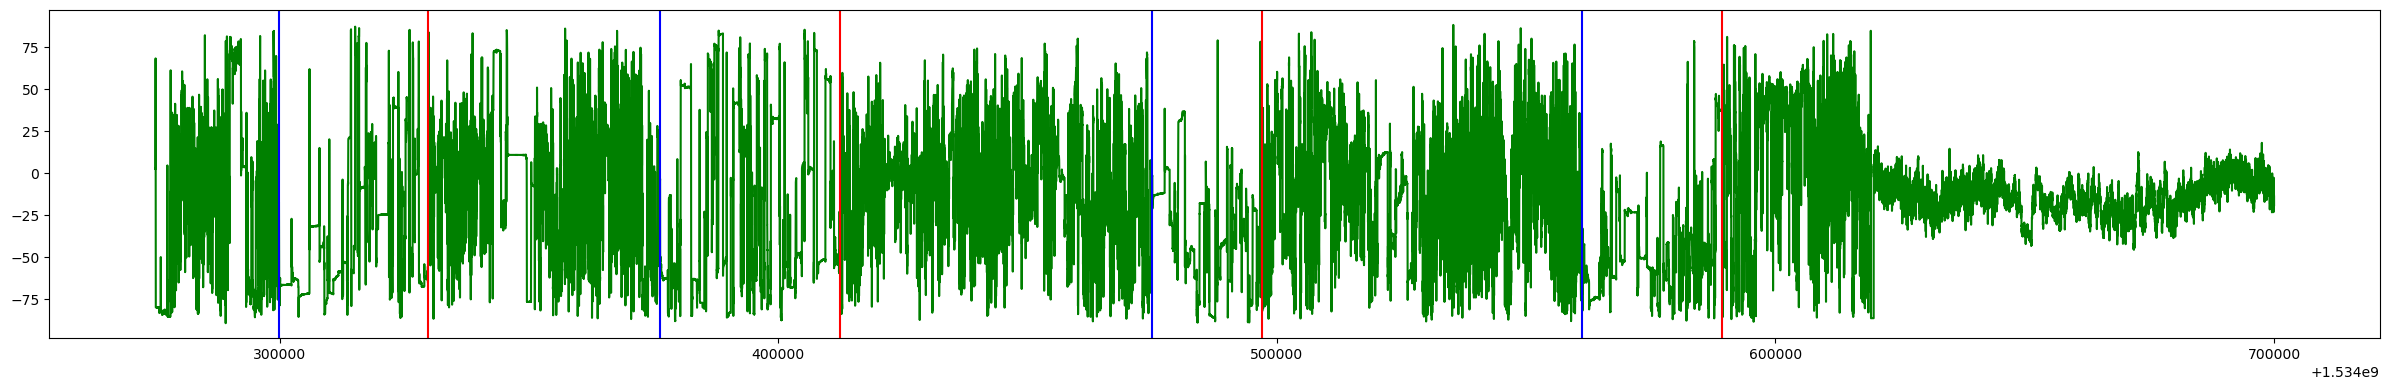

In [89]:
plt.figure(figsize=(24, 4))

boundary = 1.53470 * 1e9

mask = df1.t < boundary
plt.plot(df1.t[mask], df1.anglez[mask], color="green")
# plt.plot(df1.t, df1.anglez, color="green")

for i, data in events.iterrows():
    if data.t < boundary:
        color = "blue" if data["event"] == "onset" else "red"
        plt.axvline(data.t, color=color)

plt.tight_layout()
plt.show()

In [7]:
def standardize(x):
    x = x - x.mean()
    x = x / x.std()
    return x

In [8]:
def normalize(x):
    amax = x.max()
    amin = x.min()
    return (x - amin) / (amax - amin)

In [9]:
anglez = np.asarray(df1.anglez).astype(np.float32)
enmo = np.asarray(df1.enmo).astype(np.float32)
anglez = normalize(anglez)
enmo = normalize(enmo)

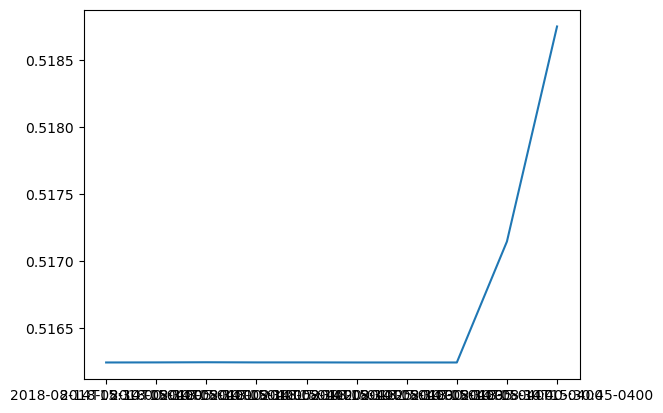

In [10]:
plt.plot(df1.timestamp[:10], anglez[:10])

In [ ]:
plt.figure(figsize=(24, 4))
plt.plot(df1.timestamp, anglez)
plt.plot(enmo)
plt.legend(["anglez", "ENMO"])
plt.tight_layout()
plt.show()

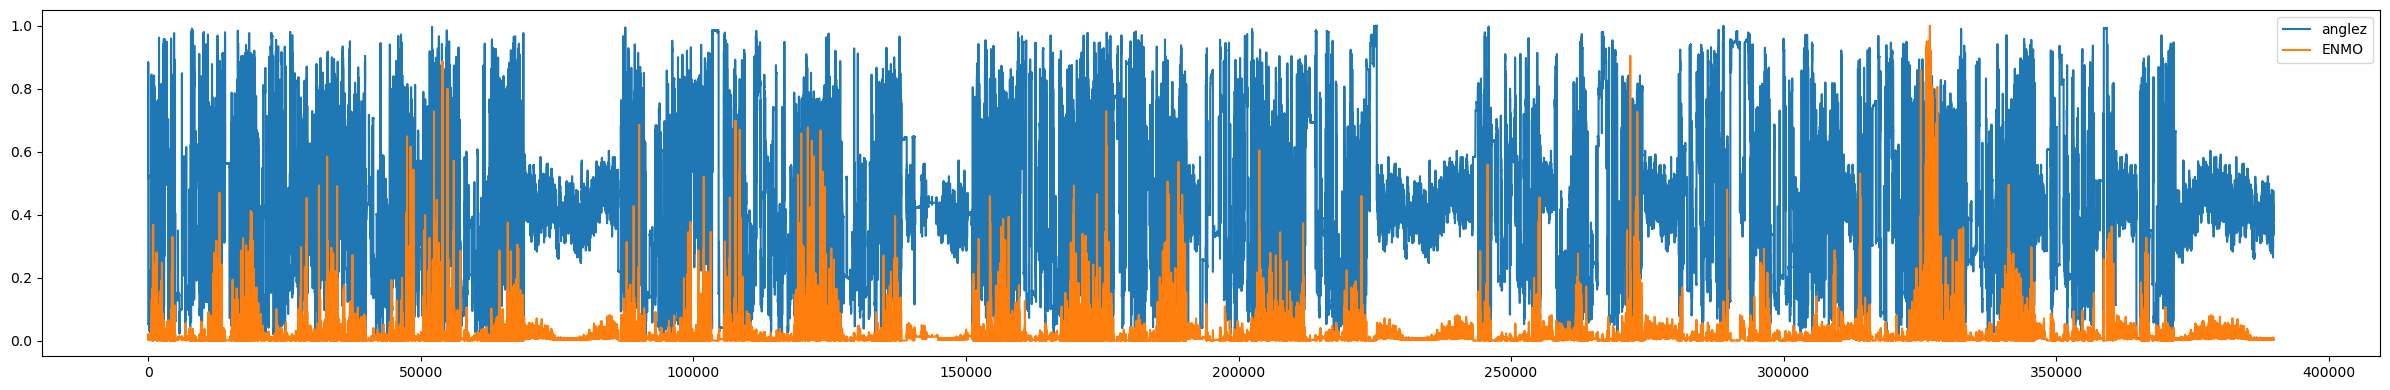

In [39]:
plt.figure(figsize=(24, 4))
plt.plot(anglez)
plt.plot(enmo)
plt.legend(["anglez", "ENMO"])
plt.tight_layout()
plt.show()

In [6]:
df

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.636700,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.636800,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.637000,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.636800,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.636800,0.0215
...,...,...,...,...,...
127946335,fe90110788d2,592375,2017-09-08T00:14:35-0400,-27.277500,0.0204
127946336,fe90110788d2,592376,2017-09-08T00:14:40-0400,-27.032499,0.0233
127946337,fe90110788d2,592377,2017-09-08T00:14:45-0400,-26.841200,0.0202
127946338,fe90110788d2,592378,2017-09-08T00:14:50-0400,-26.723900,0.0199


In [8]:
pd.read_csv("../data/kaggle-sleep-detection/sample_submission.csv")

,row_id,series_id,step,event,score
0,0,038441c925bb,100,onset,0.0
1,1,038441c925bb,105,wakeup,0.0
2,2,03d92c9f6f8a,80,onset,0.5
3,3,03d92c9f6f8a,110,wakeup,0.5
4,4,0402a003dae9,90,onset,1.0
5,5,0402a003dae9,120,wakeup,1.0


In [11]:
pd.read_parquet("../data/kaggle-sleep-detection/test_series.parquet", engine="pyarrow")

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.636700,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.636800,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.637000,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.636800,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.636800,0.0215
...,...,...,...,...,...
445,0402a003dae9,145,2018-12-18T12:57:05-0500,-59.696899,0.0601
446,0402a003dae9,146,2018-12-18T12:57:10-0500,-35.656601,0.0427
447,0402a003dae9,147,2018-12-18T12:57:15-0500,-21.582399,0.0309
448,0402a003dae9,148,2018-12-18T12:57:20-0500,-42.616001,0.0328
